In [1]:
import qiskit as q
%matplotlib inline

In [2]:
circuit = q.QuantumCircuit(2,2) # 2 quibits 2 bits

circuit.x(0) # not
circuit.cx(0,1) # controlled not
circuit.measure([0,1],[0,1])
circuit.draw()

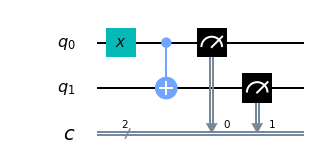

In [4]:
circuit.draw(output="mpl")

In [7]:
from qiskit import IBMQ
IBMQ.save_account("9ff4c5b4613d3d1b475a51b7f6be65d545b3d4e8c946f269494dc42ec65da1a6f8272a48ed6410e452b8f4cdaa400b1457218c1a4214e4a2ec15d713cb8f392d")

Credentials already present. Set overwrite=True to overwrite.


In [8]:
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [23]:
provider = IBMQ.get_provider()
for backend in provider.backends():
    try:
        bitcount= len(backend.properties().qubits)
    except:
        bitcount= "simulated"
    print("Backend provider ",backend," open, with",bitcount," qubits:",backend.status().pending_jobs," pending jobs")

Backend provider  ibmq_qasm_simulator  open, with simulated  quibits: 0  pending jobs
Backend provider  ibmqx2  open, with 5  quibits: 0  pending jobs
Backend provider  ibmq_16_melbourne  open, with 15  quibits: 8  pending jobs
Backend provider  ibmq_vigo  open, with 5  quibits: 2  pending jobs
Backend provider  ibmq_ourense  open, with 5  quibits: 4  pending jobs
Backend provider  ibmq_london  open, with 5  quibits: 0  pending jobs
Backend provider  ibmq_burlington  open, with 5  quibits: 0  pending jobs
Backend provider  ibmq_essex  open, with 5  quibits: 1  pending jobs
Backend provider  ibmq_armonk  open, with 1  quibits: 0  pending jobs


In [20]:
from qiskit.tools.monitor import job_monitor

backend = provider.get_backend("ibmq_london")
job= q.execute(circuit, backend = backend, shots=500)
job_monitor(job)

Job Status: job has successfully run


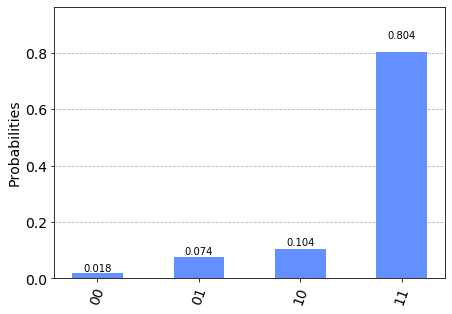

In [22]:
from qiskit.visualization import plot_histogram
from matplotlib import style

results= job.result()
counts= results.get_counts(circuit)

plot_histogram([counts])
